<a href="https://colab.research.google.com/github/HSGanesh/1CD22AI023/blob/main/DeepReinformentLearning/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

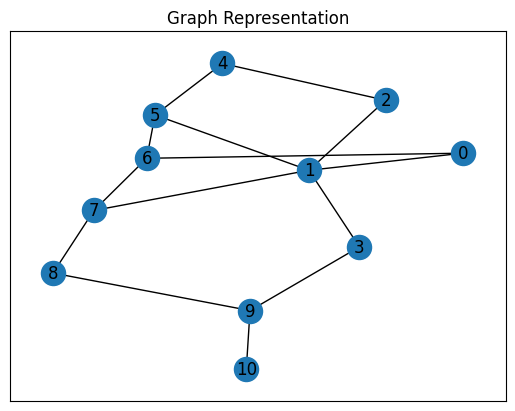

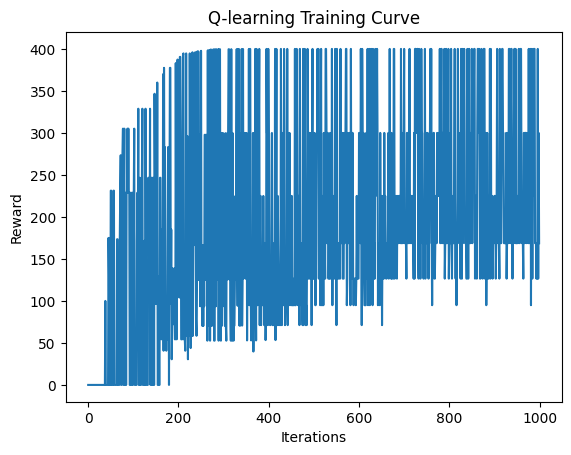

Optimal Path: [0, np.int64(1), np.int64(3), np.int64(9), np.int64(10)]


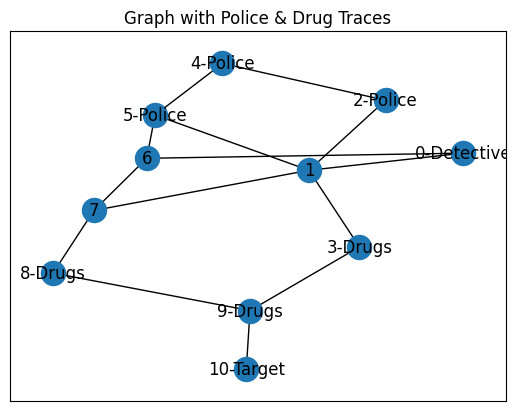

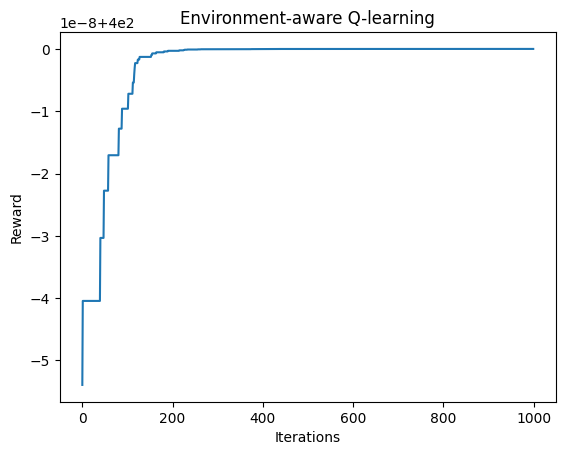

Police matrix:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  9.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 68.  0.  0. 15.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 14.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Drug trace matrix:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 85.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 94.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 77.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 83.  0.]
 [ 0.  0.  0.  3.  0.  

In [4]:
import numpy as np
import pylab as pl
import networkx as nx
import random

# -----------------------------
# Graph Definition
# -----------------------------
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
         (1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
         (8, 9), (7, 8), (1, 7), (3, 9)]

GOAL = 10
N = 11

# -----------------------------
# Graph Visualization (Original Graph)
# -----------------------------
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx(G, pos)
pl.title("Graph Representation")
pl.show()

# -----------------------------
# Reward Matrix
# -----------------------------
M = -1 * np.ones((N, N))
for s, d in edges:
    M[s, d] = 100 if d == GOAL else 0
    M[d, s] = 100 if s == GOAL else 0
M[GOAL, GOAL] = 100

# -----------------------------
# Q-learning Parameters
# -----------------------------
Q = np.zeros((N, N))
gamma = 0.75
epsilon = 0.2
episodes = 1000

# -----------------------------
# Helper Functions
# -----------------------------
def available_actions(state):
    return np.where(M[state] >= 0)[0]

def choose_action(state):
    actions = available_actions(state)
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)
    return actions[np.argmax(Q[state, actions])]

def update(state, action):
    Q[state, action] = M[state, action] + gamma * np.max(Q[action])
    return Q[state, action]

# -----------------------------
# Training Phase (Graph 1: Learning Curve)
# -----------------------------
scores = []
for _ in range(episodes):
    state = random.randint(0, N - 1)
    action = choose_action(state)
    scores.append(update(state, action))

pl.plot(scores)
pl.xlabel("Iterations")
pl.ylabel("Reward")
pl.title("Q-learning Training Curve")
pl.show()

# -----------------------------
# Optimal Path
# -----------------------------
state = 0
path = [state]
while state != GOAL:
    state = np.argmax(Q[state])
    path.append(state)

print("Optimal Path:", path)

# -----------------------------
# Environment Definition
# -----------------------------
police = [2, 4, 5]
drug_traces = [3, 8, 9]

mapping = {
    0: '0-Detective', 1: '1', 2: '2-Police', 3: '3-Drugs',
    4: '4-Police', 5: '5-Police', 6: '6', 7: '7',
    8: '8-Drugs', 9: '9-Drugs', 10: '10-Target'
}

H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H, seed=42)

nx.draw_networkx(H, pos)
pl.title("Graph with Police & Drug Traces")
pl.show()

# -----------------------------
# Environment-aware Learning
# -----------------------------
env_police = np.zeros((N, N))
env_drugs = np.zeros((N, N))

def observe_environment(action):
    obs = []
    if action in police:
        obs.append('p')
    if action in drug_traces:
        obs.append('d')
    return obs

def update_env(state, action):
    update(state, action)
    obs = observe_environment(action)
    if 'p' in obs:
        env_police[state, action] += 1
    if 'd' in obs:
        env_drugs[state, action] += 1

# -----------------------------
# Environment Training Curve (Graph 2)
# -----------------------------
scores_env = []
for _ in range(episodes):
    state = random.randint(0, N - 1)
    action = choose_action(state)
    update_env(state, action)
    scores_env.append(np.max(Q))

pl.plot(scores_env)
pl.xlabel("Iterations")
pl.ylabel("Reward")
pl.title("Environment-aware Q-learning")
pl.show()

print("Police matrix:\n", env_police)
print("Drug trace matrix:\n", env_drugs)
